数据网站，http://quotes.money.163.com/stock

下载交易历史数据：http://quotes.money.163.com/cjmx/2019/20191120/1300127.xls
，获得一个SCV文件。结构如下：
成交时间,成交价,价格变动,成交量（手）,成交额（元）,性质
09:30:06,17.2,-0.05,50,86011,卖盘
09:30:09,17.21,0.01,887,1525626,买盘
大概每3秒一条记录。

## Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime


## Data Plot

/Users/wj/项目/langstudy/python/py3study/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


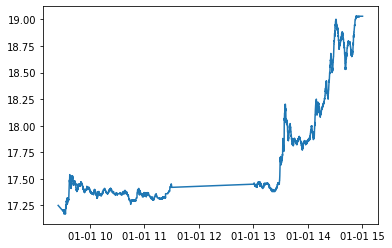

In [2]:
data = pd.read_csv('data/ashare/30012720191120.csv', usecols = [0, 1, 3], converters={
    0:lambda x:datetime.strptime(x, '%H:%M:%S')
})
# print(data)

training_set = data.iloc[:,1].values
timeline = data.iloc[:,0].values

plt.plot(timeline, training_set, )

plt.show()

In [3]:
def local_price(file):
    data = pd.read_csv(file, usecols=[0, 1, 3], converters={
        0: lambda x: datetime.strptime(x, '%H:%M:%S')
    })

    for i in data.iloc[:,1].values:
        yield i

In [6]:
from stock import train, sliding_windows, predict, LSTM
import time

loader = local_price('data/ashare/30012720191120.csv')

num_epochs = 100

num_classes = 3
seq_length = 12

input_size = 1
hidden_size = 2
num_layers = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers, seq_length)

sc = MinMaxScaler()

bucket = []
data = []
predict_y = None
aloss_list = []
loss_list = []
x_list = []
y_list = []
for price in loader:

    bucket.append([float(price)])
    # print(bucket, data)
    if len(bucket) >= seq_length:
        data.append(bucket)
        
        if len(data) > 1:
            if predict_y is not None:
                x = torch.tensor(predict_y)
                y = torch.tensor(bucket[:num_classes]).view(-1)
                loss = y - x
                aloss = loss.sum()/num_classes
                
                loss_list += list(loss.view(-1).numpy())
                x_list += list(x.view(-1).numpy())
                y_list += list(y.view(-1).numpy())
                aloss_list.append(aloss)

                # print(x)
#                 print(y)
#                 print(aloss, elapsed)
#                 print()

            t1 = time.time()
            training_data = torch.Tensor(data)
            training_data = sc.fit_transform(training_data.view(-1, 1))
            # training_data = torch.Tensor([training_data])

            x, y = sliding_windows(training_data, seq_length, num_classes)
            trainX = torch.Tensor(np.array(x))
            trainY = torch.Tensor(np.array(y))

            loss = train(lstm, num_epochs, num_classes, trainX, trainY)
            elapsed = time.time() - t1

            predict_data = data[-1]
            predict_y = predict(lstm, predict_data)
            print(predict_y)

        bucket = bucket[num_classes:]


[[17.20028  17.200127 17.200401]]
[[17.198948 17.198017 17.197758]]
[[17.196112 17.1972   17.199076]]
[[17.192326 17.189346 17.185535]]
[[17.186506 17.184284 17.181341]]
[[17.160664 17.15994  17.166712]]
[[17.160015 17.15675  17.163033]]
[[17.17498  17.175467 17.177805]]
[[17.18387  17.183182 17.184475]]
[[17.17803  17.178156 17.178686]]
[[17.178879 17.178545 17.178637]]
[[17.172762 17.171532 17.172855]]
[[17.181313 17.180473 17.179201]]
[[17.169811 17.168158 17.16974 ]]
[[17.17528  17.172497 17.174131]]
[[17.192604 17.181936 17.181862]]
[[17.19187  17.189232 17.189407]]
[[17.218637 17.208565 17.206156]]
[[17.230314 17.226988 17.226088]]
[[17.253016 17.244608 17.242323]]
[[17.273499 17.2726   17.272472]]
[[17.292587 17.295256 17.296816]]
[[17.285042 17.283394 17.282597]]
[[17.293297 17.291956 17.291496]]
[[17.2975   17.29655  17.296173]]
[[17.298836 17.297722 17.2972  ]]
[[17.300594 17.299885 17.299648]]
[[17.298725 17.297682 17.297293]]
[[17.303286 17.302668 17.30247 ]]
[[17.300877 17

[[17.379772 17.379814 17.37983 ]]
[[17.370455 17.371288 17.371712]]
[[17.368267 17.369574 17.370235]]
[[17.364    17.366049 17.367094]]
[[17.361332 17.361849 17.362114]]
[[17.35926  17.35944  17.359526]]
[[17.359774 17.359873 17.359919]]
[[17.360262 17.360365 17.360413]]
[[17.361607 17.361744 17.361814]]
[[17.364286 17.364147 17.364075]]
[[17.36577  17.366144 17.366327]]
[[17.36202  17.362658 17.362982]]
[[17.361607 17.36213  17.362398]]
[[17.361465 17.361984 17.36225 ]]
[[17.360271 17.36038  17.360428]]
[[17.360106 17.360163 17.360188]]
[[17.359983 17.359957 17.359936]]
[[17.36151  17.362066 17.362354]]
[[17.36866  17.36886  17.368958]]
[[17.366894 17.367142 17.367273]]
[[17.360144 17.361021 17.36147 ]]
[[17.363592 17.364422 17.36484 ]]
[[17.362097 17.362791 17.363142]]
[[17.360163 17.360277 17.36033 ]]
[[17.360146 17.360235 17.360277]]
[[17.36467  17.363903 17.363522]]
[[17.362207 17.363352 17.363941]]
[[17.369066 17.36993  17.37038 ]]
[[17.376656 17.377129 17.377367]]
[[17.38677  17

[[17.433239 17.432455 17.431934]]
[[17.441244 17.440845 17.440573]]
[[17.45893  17.460157 17.460953]]
[[17.457933 17.458155 17.458296]]
[[17.458107 17.458204 17.458267]]
[[17.461584 17.462263 17.462706]]
[[17.459797 17.460402 17.460802]]
[[17.459854 17.46044  17.460829]]
[[17.459003 17.459127 17.459206]]
[[17.462816 17.463228 17.4635  ]]
[[17.46641  17.466019 17.465757]]
[[17.480904 17.480352 17.479986]]
[[17.48988  17.489017 17.488447]]
[[17.532406 17.529945 17.528393]]
[[17.577038 17.573832 17.571735]]
[[17.630608 17.625141 17.621572]]
[[17.656748 17.652206 17.649199]]
[[17.682981 17.680847 17.67933 ]]
[[17.70362  17.70327  17.703005]]
[[17.69559  17.698084 17.699726]]
[[17.70175 17.70316 17.70411]]
[[17.70543  17.70662  17.707409]]
[[17.697807 17.700573 17.702461]]
[[17.692093 17.694267 17.695677]]
[[17.679514 17.681133 17.682215]]
[[17.682487 17.684034 17.685068]]
[[17.684248 17.685575 17.686462]]
[[17.677946 17.67806  17.678139]]
[[17.679142 17.679111 17.679089]]
[[17.686258 17.68

[[18.15371  18.15383  18.153917]]
[[18.149263 18.150135 18.150766]]
[[18.156715 18.157373 18.1579  ]]
[[18.170057 18.170225 18.170355]]
[[18.175869 18.175396 18.17501 ]]
[[18.178537 18.17735  18.17638 ]]
[[18.19162 18.18992 18.18854]]
[[18.209106 18.209284 18.209423]]
[[18.221409 18.222208 18.222857]]
[[18.203424 18.20447  18.205303]]
[[18.197998 18.202427 18.205992]]
[[18.21357 18.2159  18.21766]]
[[18.172009 18.178144 18.182703]]
[[18.13759  18.141636 18.144747]]
[[18.119453 18.12724  18.133337]]
[[18.120699 18.123034 18.12485 ]]
[[18.110184 18.1133   18.115707]]
[[18.102125 18.10441  18.106188]]
[[18.102537 18.103722 18.10464 ]]
[[18.1025   18.104097 18.105389]]
[[18.12128  18.122307 18.123098]]
[[18.110394 18.113394 18.115725]]
[[18.110458 18.110626 18.110764]]
[[18.122965 18.12298  18.122993]]
[[18.124657 18.124222 18.123884]]
[[18.13048  18.130007 18.129652]]
[[18.138834 18.138498 18.138247]]
[[18.149633 18.14926  18.148977]]
[[18.156223 18.155798 18.155468]]
[[18.161274 18.16194

[[18.931404 18.931198 18.93107 ]]
[[18.941645 18.9413   18.94107 ]]
[[18.96363  18.963491 18.963402]]
[[18.976076 18.97575  18.975464]]
[[18.989428 18.989037 18.98865 ]]
[[18.995228 18.994665 18.994179]]
[[18.998774 18.998466 18.998236]]
[[19.010235 19.010305 19.010353]]
[[19.01756  19.018412 19.019089]]
[[19.020018 19.02001  19.020002]]
[[19.023685 19.023924 19.02409 ]]
[[19.026733 19.028261 19.028801]]
[[19.02136  19.021547 19.021626]]
[[19.029465 19.03031  19.031002]]
[[19.031725 19.03191  19.032024]]
[[19.028664 19.029718 19.030506]]
[[19.031164 19.031506 19.031816]]
[[19.029308 19.030329 19.031168]]
[[19.03262  19.032307 19.03216 ]]
[[19.032833 19.03252  19.032269]]
[[19.032858 19.03261  19.03236 ]]
[[19.032806 19.032637 19.032501]]
[[19.03285  19.032652 19.032642]]
[[19.032688 19.032446 19.03238 ]]
[[19.03303  19.032566 19.032421]]
[[19.032946 19.03254  19.032112]]
[[19.032969 19.032595 19.032112]]
[[19.020996 19.021109 19.021185]]
[[19.030813 19.03114  19.031343]]
[[19.030891 19

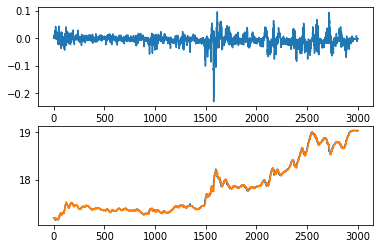

In [7]:
plt.subplot(2,1,1)
plt.plot(loss_list, )
plt.subplot(2,1,2)
plt.plot(x_list, )
plt.plot(y_list, )
plt.show()